In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

BostonHouse=pd.read_csv("C:/Users/mchil/Downloads/Python batch/BostonHousingData.csv")
BostonHouse.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Data description
The business meaning of each column in the data is as below

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 dollars
* PTRATIO - pupil/teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's


In [3]:
BostonHouse.duplicated().sum()

0

* Target :- MEDV
* Predictors :- CRIM, ZN, INDUS, CHAS, NOX, RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT

<AxesSubplot:>

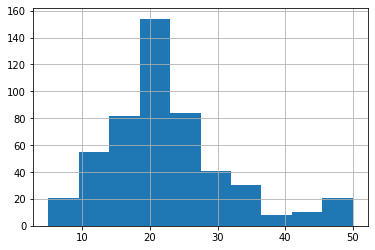

In [4]:
BostonHouse['MEDV'].hist()

### Basic Data Exploration
* info()
* head()
* describe()
* nuniques()

In [5]:
print(BostonHouse.head(),"\n")
print(BostonHouse.info(),'\n',BostonHouse.describe(),'\n',BostonHouse.nunique(),sep='\n')

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    floa

In [6]:
BostonHouse['RAD'].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24], dtype=int64)

* Categorical :- CHAS,RAD
* Continuous :- 'CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX','PTRATIO', 'B', 'LSTAT'

In [7]:
categ=['CHAS','RAD']
conti=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX','PTRATIO', 'B', 'LSTAT']

### Univariate Analysis
* Categorical Variable

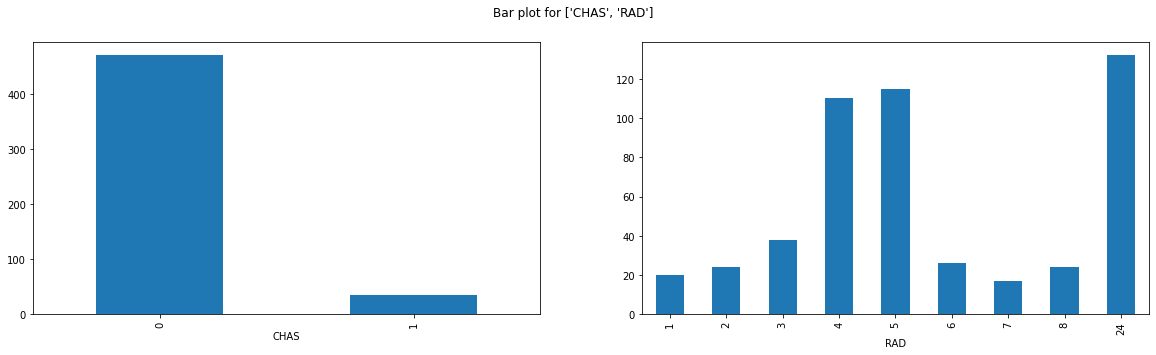

In [8]:
def plot_bar(df,cols):
    %matplotlib inline
    fig,subplot=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
    fig.suptitle("Bar plot for "+str(cols))
    
    for i,j in zip(cols,range(len(cols))):
        df.groupby(i).size().plot(kind='bar',ax=subplot[j])

plot_bar(BostonHouse,categ)

* Continuous Variable

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>],
       [<AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>]],
      dtype=object)

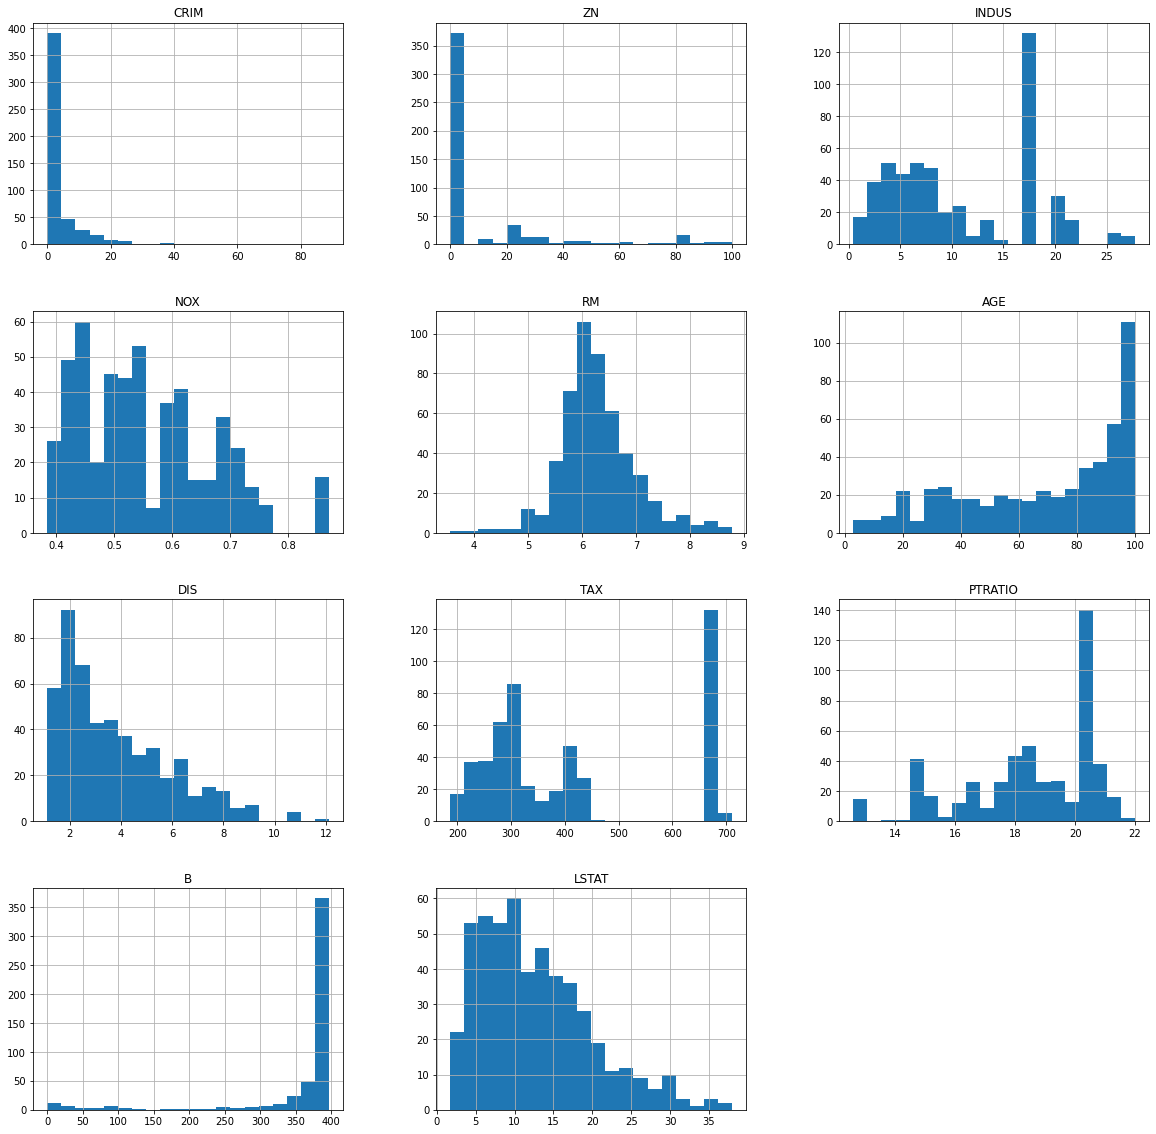

In [9]:
BostonHouse.hist(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX','PTRATIO', 'B', 'LSTAT'],figsize=(20,20),bins=20)

In [10]:
BostonHouse['CRIM'][BostonHouse['CRIM']<60].sort_values(ascending=False)

410    51.13580
414    45.74610
404    41.52920
398    38.35180
427    37.66190
         ...   
55      0.01311
341     0.01301
285     0.01096
284     0.00906
0       0.00632
Name: CRIM, Length: 503, dtype: float64

In [11]:
BostonHouse['CRIM'][BostonHouse['CRIM']>60]=51.13

<AxesSubplot:>

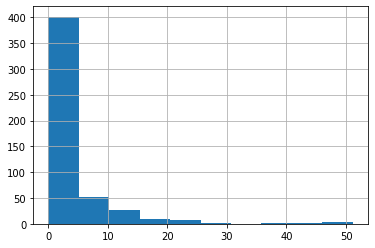

In [12]:
BostonHouse['CRIM'].hist()


### Bivariate Analysis
* Continuous vs Continuous

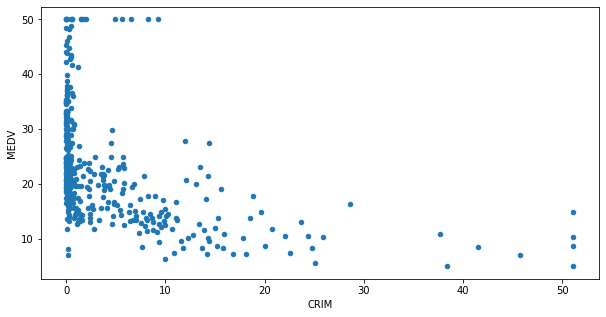

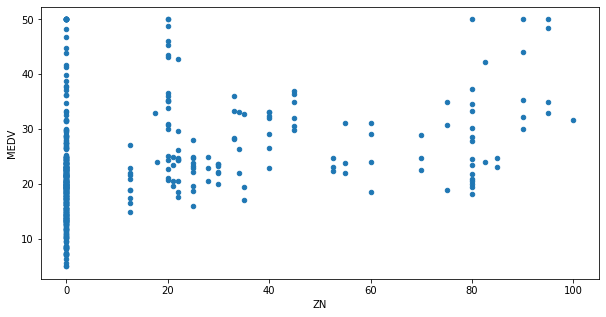

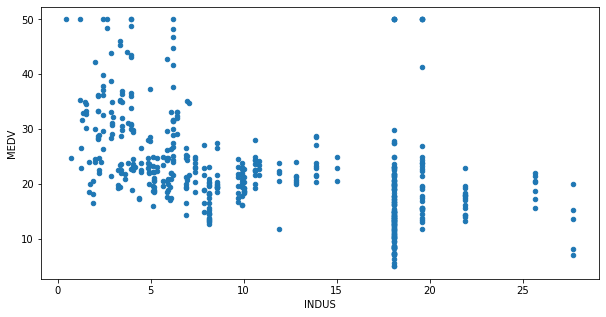

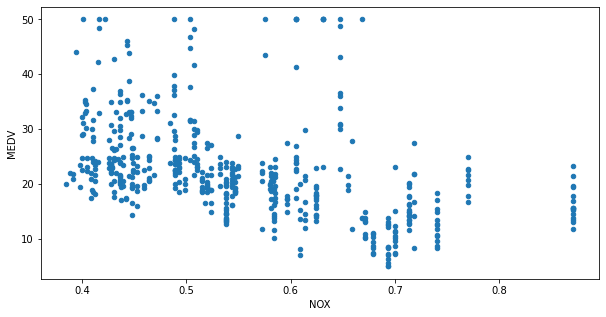

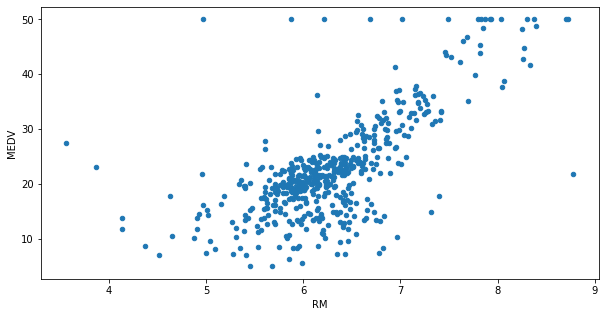

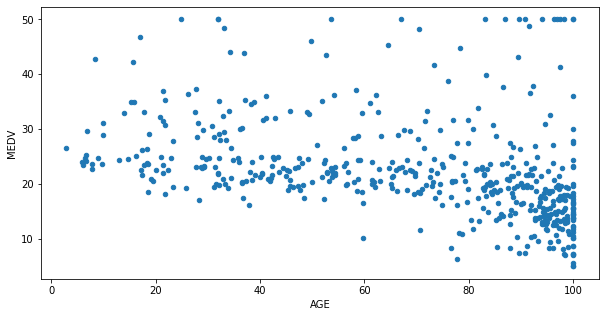

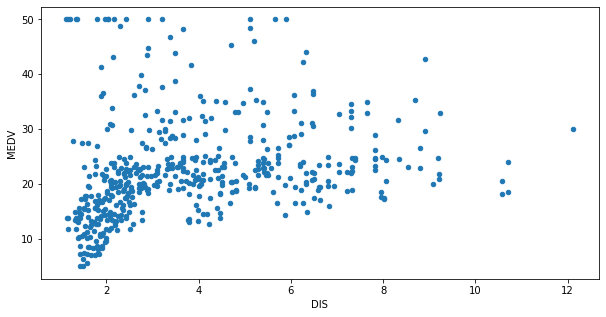

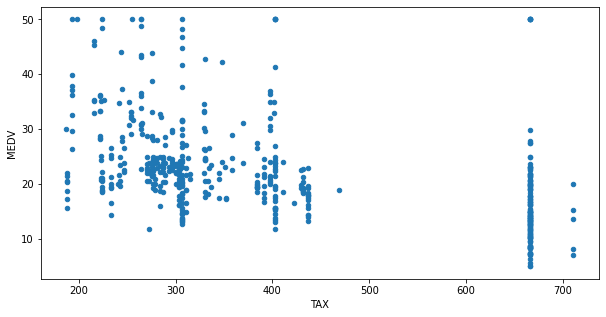

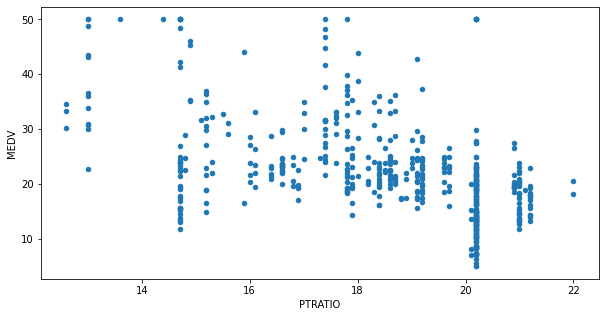

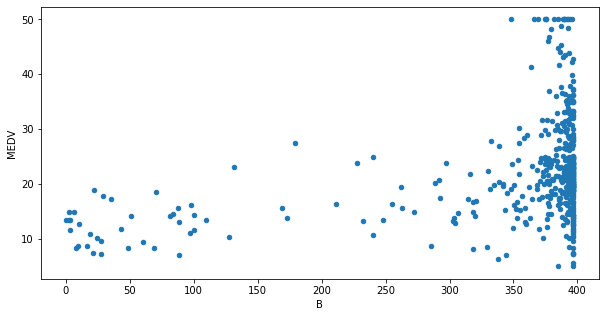

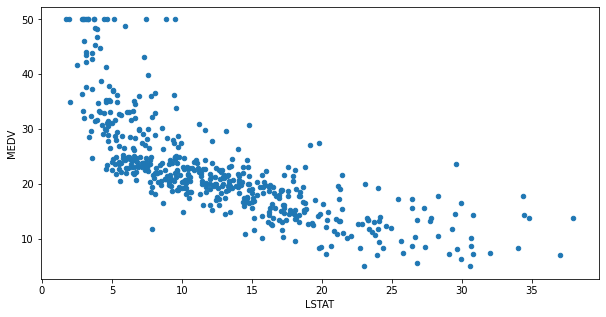

In [13]:
for i in conti:
    BostonHouse.plot.scatter(x=i,y='MEDV',figsize=(10,5))

In [14]:
corrdata=BostonHouse[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX','PTRATIO', 'B', 'LSTAT','MEDV']].corr()

In [15]:
corrdata['MEDV'][abs(corrdata['MEDV'])>0.5]

RM         0.695360
PTRATIO   -0.507787
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

* Categorical vs Continuous

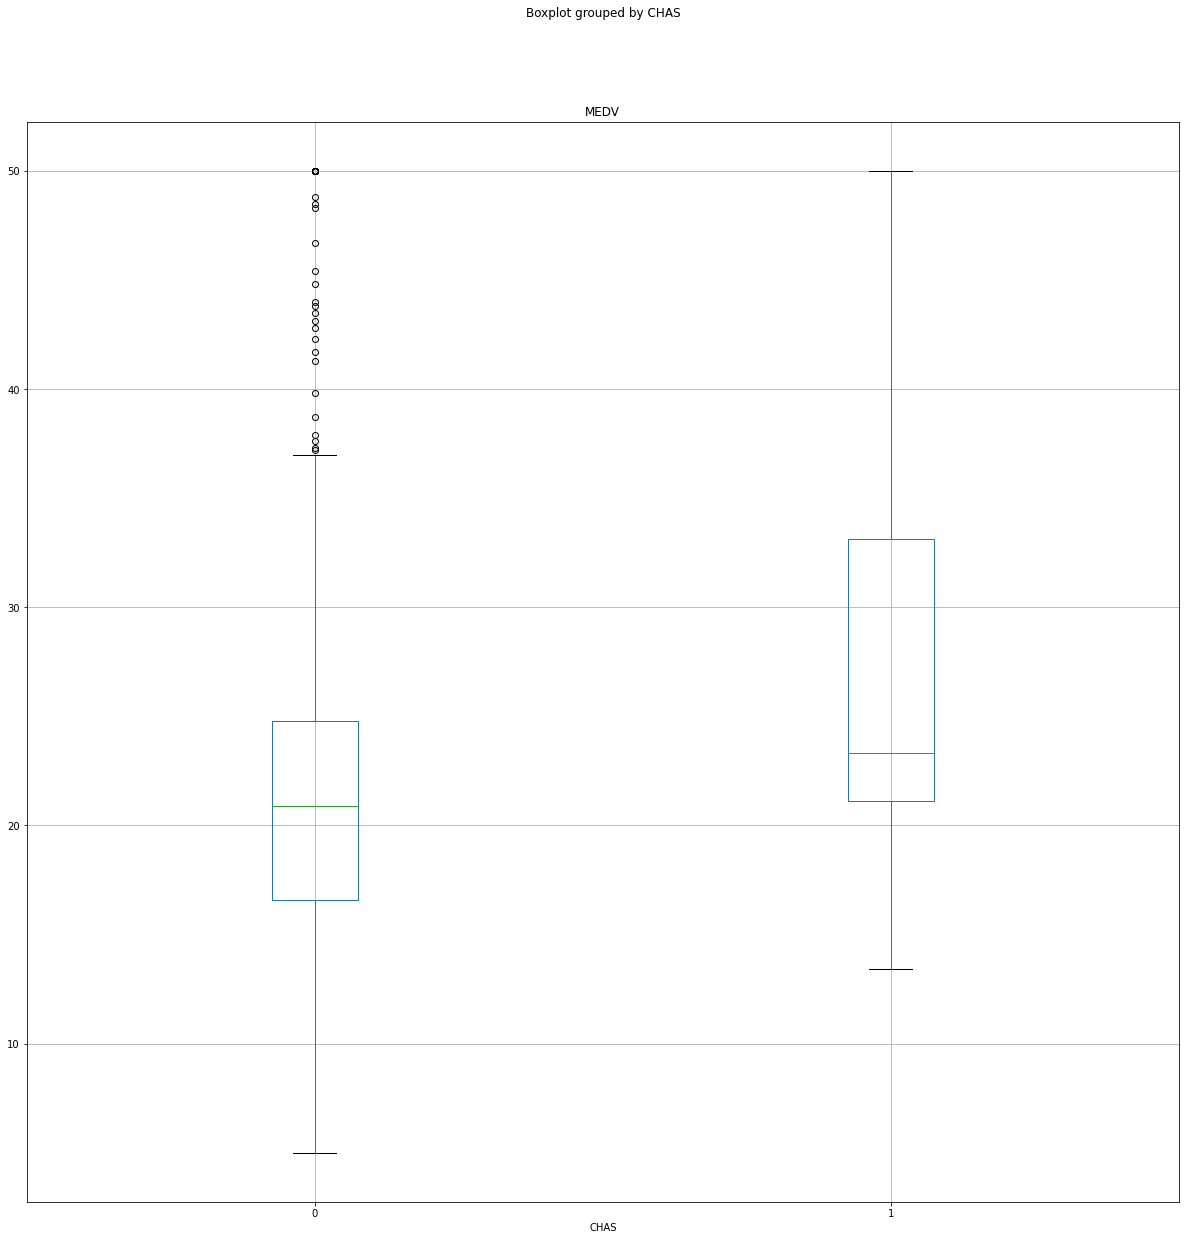

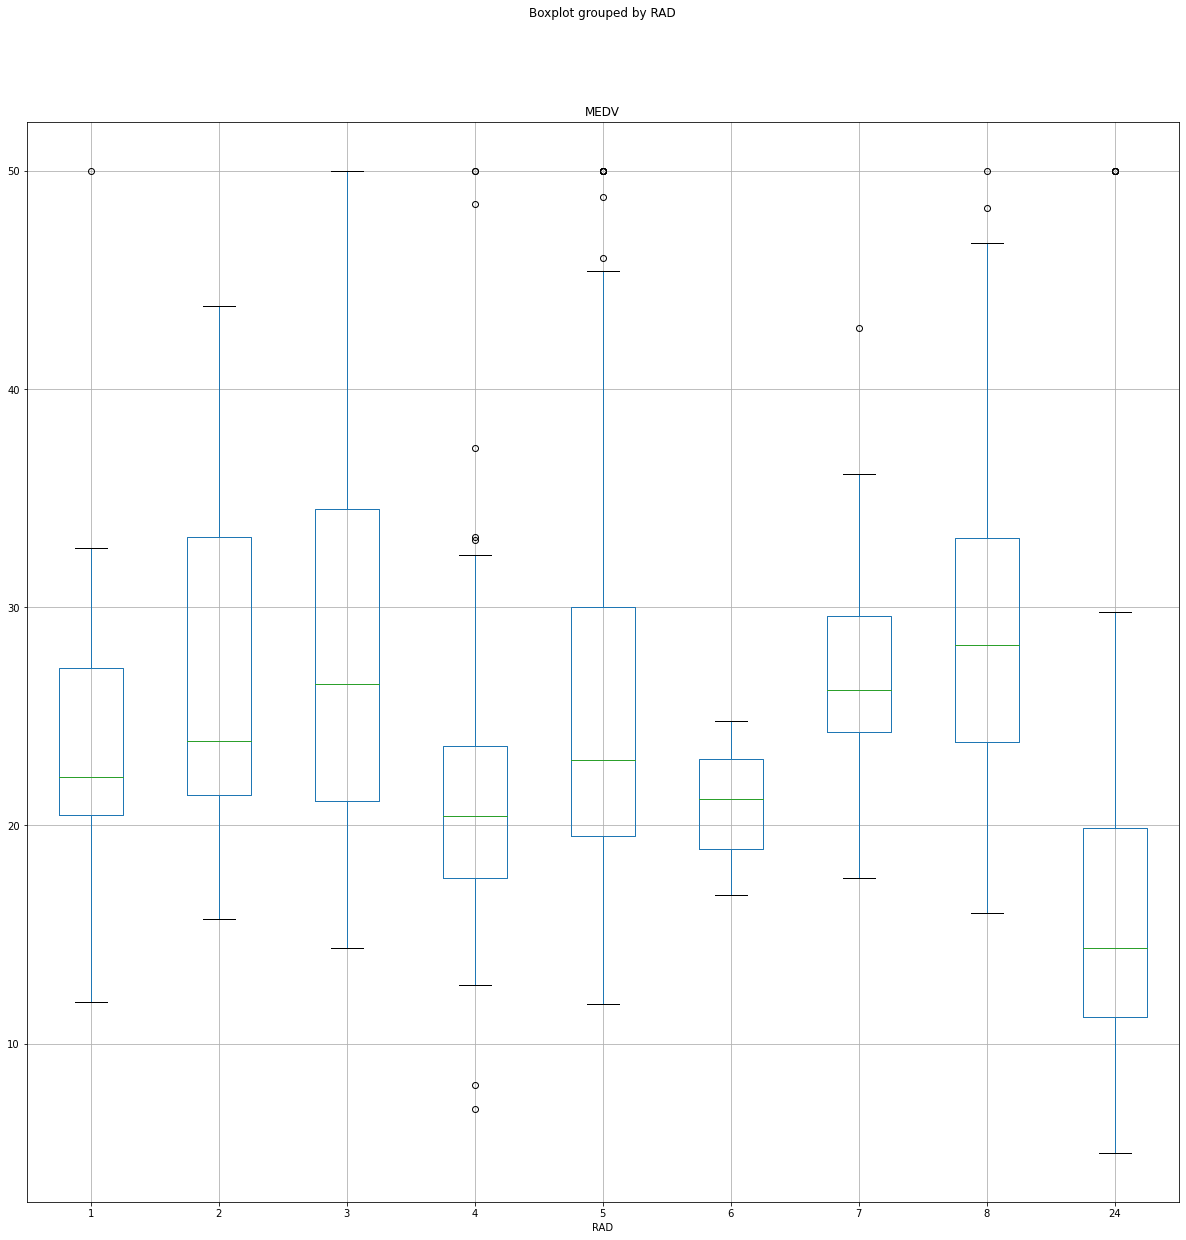

In [16]:
for i in categ:
    BostonHouse.boxplot(column='MEDV',by=i,figsize=(20,20))

In [17]:
# Annova Test
# Annova Test

def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            # Accepting the H0 if the P value is more than 0.05
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [18]:
FunctionAnova(BostonHouse,'MEDV',categ)


##### ANOVA Results ##### 

CHAS is correlated with MEDV | P-Value: 7.390623170520815e-05
RAD is correlated with MEDV | P-Value: 3.1256493316010175e-24


['CHAS', 'RAD']

* Selected Continuous :- RM,PTRATIO,LSTAT
* Selected Categorical :- CHAS,RAD
* Target :- MEDV

### Extracting Selected Variables

In [19]:
DataML=BostonHouse[['RM','PTRATIO','LSTAT','RAD','CHAS','MEDV']]
DataML.head()

,RM,PTRATIO,LSTAT,RAD,CHAS,MEDV
0,6.575,15.3,4.98,1,0,24.0
1,6.421,17.8,9.14,2,0,21.6
2,7.185,17.8,4.03,2,0,34.7
3,6.998,18.7,2.94,3,0,33.4
4,7.147,18.7,5.33,3,0,36.2


* Genrating Dummy variables for categorical features

In [20]:
DataML=pd.get_dummies(DataML)

#### Preparing Data For ML

In [33]:
predictors=['RM','PTRATIO','LSTAT','CHAS','RAD']
target='MEDV'

X=DataML[predictors].values
y=DataML[target].values

In [34]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

#### Normalization and Standardization


In [22]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler=MinMaxScaler()

X=scaler.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=428)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape,sep='\n')

(354, 5)
(152, 5)
(354,)
(152,)


In [24]:
X

array([[0.57750527, 0.28723404, 0.08967991, 0.        , 0.        ],
       [0.5479977 , 0.55319149, 0.2044702 , 0.        , 0.04347826],
       [0.6943859 , 0.55319149, 0.06346578, 0.        , 0.04347826],
       ...,
       [0.65433991, 0.89361702, 0.10789183, 0.        , 0.        ],
       [0.61946733, 0.89361702, 0.13107064, 0.        , 0.        ],
       [0.47307913, 0.89361702, 0.16970199, 0.        , 0.        ]])

### Multiple Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

LR=LinearRegression()
LR.fit(X_train,y_train)

print("R2 score of Model is :- ",metrics.r2_score(y_train,LR.predict(X_train)))

predict=LR.predict(X_test)

#  --------------------------------------------------------- #

# TestData=pd.DataFrame(X_test,columns=pf.get_feature_names()) For Polynomial Regression
TestData=pd.DataFrame(X_test,columns=predictors)
TestData['MEDV']=y_test

# APE
APE=(abs(y_test-predict)/y_test)*100
# MAPE
MAPE=np.mean(APE)
#MedAPE
MedAPE=np.median(APE)

TestData['MEDV_predicted']=predict
TestData['APE']=APE

print(TestData[['MEDV','MEDV_predicted','APE']])
print("Mean accuracy of model is :- ",100-MAPE)
print("Median accuracy of model is :- ",100-MedAPE)



R2 score of Model is :-  0.6838739326802401
     MEDV  MEDV_predicted        APE
0    44.0       35.254302  19.876586
1    21.4       22.736968   6.247515
2    31.0       32.886706   6.086149
3    14.4        9.353910  35.042289
4    23.7       24.878214   4.971365
..    ...             ...        ...
147   8.8        1.086824  87.649728
148  10.2        3.858440  62.172155
149  36.0       34.569632   3.973245
150  13.2       11.312930  14.295983
151  21.6       25.338814  17.309323

[152 rows x 3 columns]
Mean accuracy of model is :-  80.55383508342382
Median accuracy of model is :-  88.36104967622754


In [26]:
y_test.shape
predict.shape

(152,)

In [27]:
# Cross VAlidation of Model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def MAPE_score(orig,pred):
    APE=(abs(orig-pred)/orig)*100
    MAPE=np.mean(APE)
    return (100-MAPE)

scorer=make_scorer(MAPE_score,greater_is_better=True)

CV=cross_val_score(LR,X,y,cv=10,scoring=scorer)
print(CV)
print("Final mean accuracy of model :-",CV.mean())

    

[88.78472351 90.01462311 82.93367348 82.14573469 86.66783537 88.63411206
 84.88621233 48.83600797 51.6418211  85.29449921]
Final mean accuracy of model :- 78.98392428311725


#### Polynomial Regression (Optional)

In [28]:
# from sklearn.preprocessing import PolynomialFeatures
# pf=PolynomialFeatures(degree=2,include_bias=False)
# X=pf.fit_transform(X)
# pf.get_feature_names()

### Decision Tree

R2 score of model is:- 0.9133993167350827
           RM   PTRATIO     LSTAT  CHAS       RAD  MEDV  MEDV_predicted  \
0    0.745928  0.351064  0.038079   0.0  0.086957  44.0           34.61   
1    0.498563  0.574468  0.265177   0.0  0.043478  21.4           21.26   
2    0.721594  0.042553  0.262693   0.0  0.173913  31.0           30.70   
3    0.352175  0.563830  0.802428   0.0  0.086957  14.4           19.50   
4    0.611037  0.808511  0.165839   0.0  1.000000  23.7           25.00   
..        ...       ...       ...   ...       ...   ...             ...   
147  0.154627  0.808511  0.797461   0.0  1.000000   8.8            9.40   
148  0.252730  0.808511  0.797185   0.0  1.000000  10.2            9.40   
149  0.722744  0.042553  0.167219   0.0  0.173913  36.0           34.61   
150  0.457751  0.893617  0.716887   0.0  0.130435  13.2            9.40   
151  0.547998  0.553191  0.204470   0.0  0.043478  21.6           22.54   

           APE  
0    21.340909  
1     0.654206  
2     

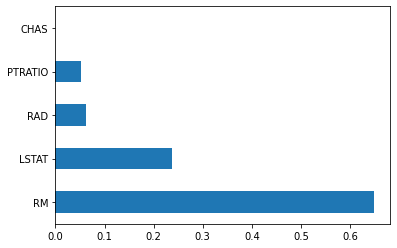

[86.46700036 91.67430612 87.77262804 86.87328743 88.56407515 88.81654498
 88.56381116 59.35419294 74.27758535 73.54170234]

Final Average Accuracy of the model: 82.59


In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn import metrics

DT=DecisionTreeRegressor(max_depth=5,criterion='mse')

DT.fit(X_train,y_train)

print("R2 score of model is:-",metrics.r2_score(y_train,DT.predict(X_train)))

predDT=np.round(DT.predict(X_test).reshape(152,1),2)

# ----------------------------------------- #
TestDT=pd.DataFrame(X_test,columns=predictors)
TestDT['MEDV']=y_test

# # APE
# APE_DT=(abs(y_test-predDT)/y_test)*100
# # MAPE
# MAPE_DT=np.mean(APE_DT)
# #MedAPE
# MedAPE_DT=np.median(APE_DT)

TestDT['MEDV_predicted']=predDT
TestDT['APE']=(np.abs(TestDT['MEDV']-TestDT['MEDV_predicted'])/TestDT['MEDV'])*100

print(TestDT)
print(" Mean Accuracy of model is :- ",100-TestDT['APE'].mean())
print(" Median Accuaracy of model is :-",100-TestDT['APE'].median())

features=pd.Series(DT.feature_importances_,index=predictors)
features.nlargest(10).plot(kind='barh')
plt.show()

# --------------------------------------------------------- #

# Cross Validation 

def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DT, X , y,cv=10,  scoring=custom_Scoring)
print(Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


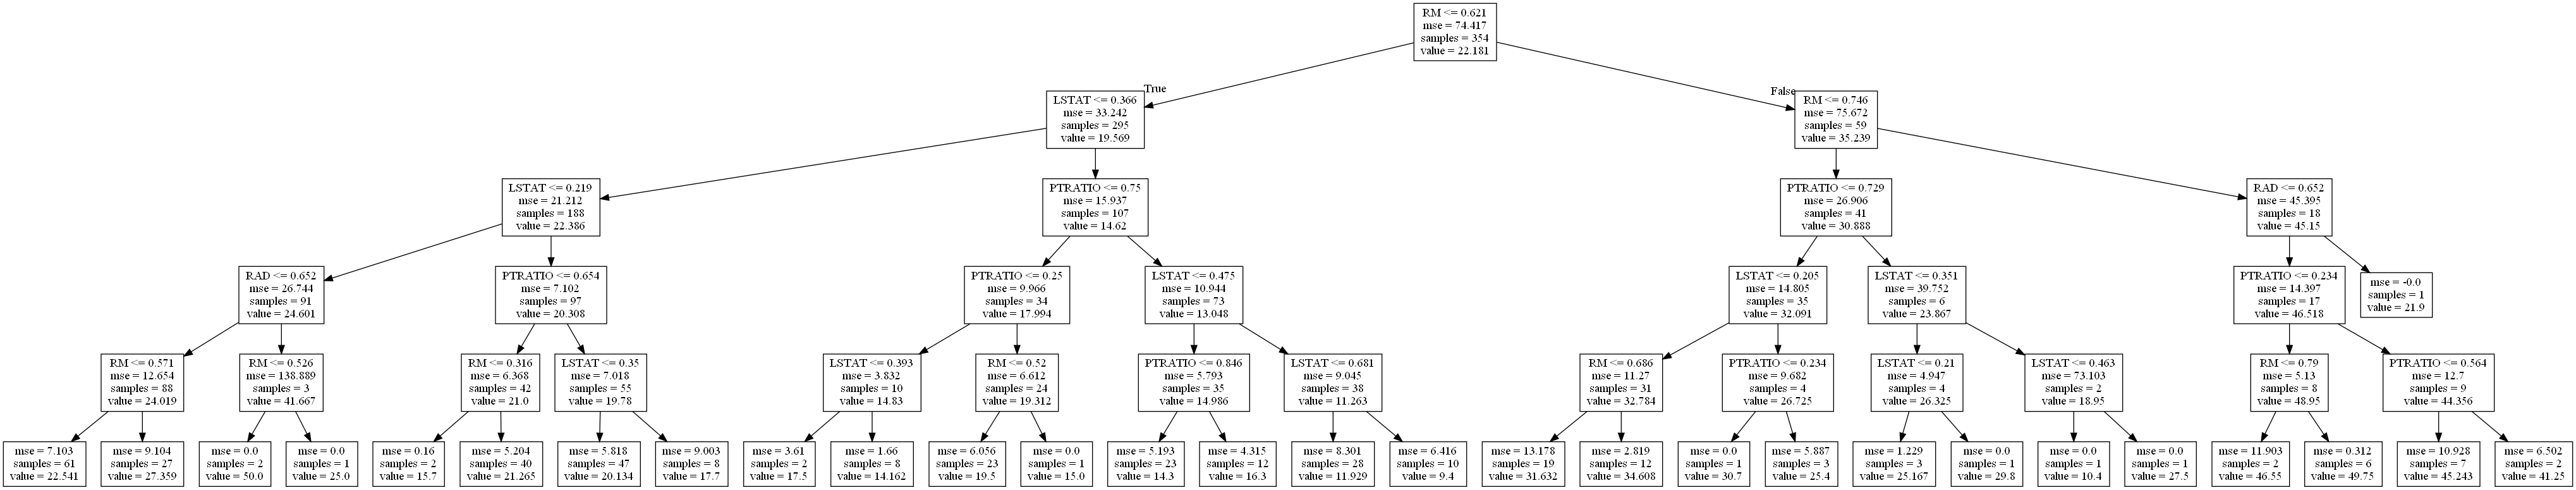

In [30]:
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(DT, out_file=None, 
                                feature_names=predictors, class_names=target)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in